# Ghost Rays comparison for a source at 100m vs 1AU for a 30arcmin off-axis angle

## @Milo
## January, 2018

In [1]:
from foxsisim.util import load_rays
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### Loading rays:

In [5]:
Mrays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/100m/30arcmin/rays_on_module_3M.csv')
print('Number of rays0 at 100m : {:d}'.format(len(Mrays)))
Arays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B2805/rays_on_module_3M.csv')
print('Number of rays0 at 1AU : {:d}'.format(len(Arays)))

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/100m/30arcmin/rays_on_module_3M.csv loaded.
Number of rays0 at 100m : 2849544
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B2805/rays_on_module_3M.csv loaded.
Number of rays0 at 1AU : 2838381


#### Detector and Rays for 100m

In [6]:
# Create detector:
from foxsisim.detector import Detector
Mdetector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

# Fix little bug in rays:
for ray in Mrays:
    ray.hist = ray.hist.tolist()

# Detector Catch rays:
Mdetector.catchRays(Mrays)

In [11]:
MDrays = [ray for ray in Mrays if (ray.des[2]==230.0 and ray.bounces ==2 )]
MSrays = [ray for ray in Mrays if (ray.des[2]==230.0 and ray.bounces ==1 )]
MHrays = [ray for ray in Mrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
MPrays = [ray for ray in Mrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

sim_scale = 1.0    # 1cm = 17.4 arcmin
#sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
MHx, MHy = [], []
for ray in Mrays:
    MHx.append(ray.pos[0]*sim_scale)
    MHy.append(ray.pos[1]*sim_scale)

# Paraboloid
MPx, MPy = [], []
for ray in Mrays:
    MPx.append(ray.pos[0]*sim_scale)
    MPy.append(ray.pos[1]*sim_scale)

# Double
MDx, MDy = [], []
for ray in MDrays:
    MDx.append(ray.pos[0]*sim_scale)
    MDy.append(ray.pos[1]*sim_scale)

#### Detector and Rays for 1AU

In [7]:
# Create detector:
from foxsisim.detector import Detector
Adetector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

# Fix little bug in rays:
for ray in Arays:
    ray.hist = ray.hist.tolist()

# Detector Catch rays:
Adetector.catchRays(Arays)

In [12]:
ADrays = [ray for ray in Arays if (ray.des[2]==230.0 and ray.bounces ==2 )]
ASrays = [ray for ray in Arays if (ray.des[2]==230.0 and ray.bounces ==1 )]
AHrays = [ray for ray in Arays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
APrays = [ray for ray in Arays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

sim_scale = 1.0    # 1cm = 17.4 arcmin
#sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
AHx, AHy = [], []
for ray in Arays:
    AHx.append(ray.pos[0]*sim_scale)
    AHy.append(ray.pos[1]*sim_scale)

# Paraboloid
APx, APy = [], []
for ray in Arays:
    APx.append(ray.pos[0]*sim_scale)
    APy.append(ray.pos[1]*sim_scale)

# Double
ADx, ADy = [], []
for ray in ADrays:
    ADx.append(ray.pos[0]*sim_scale)
    ADy.append(ray.pos[1]*sim_scale)

### Plotting

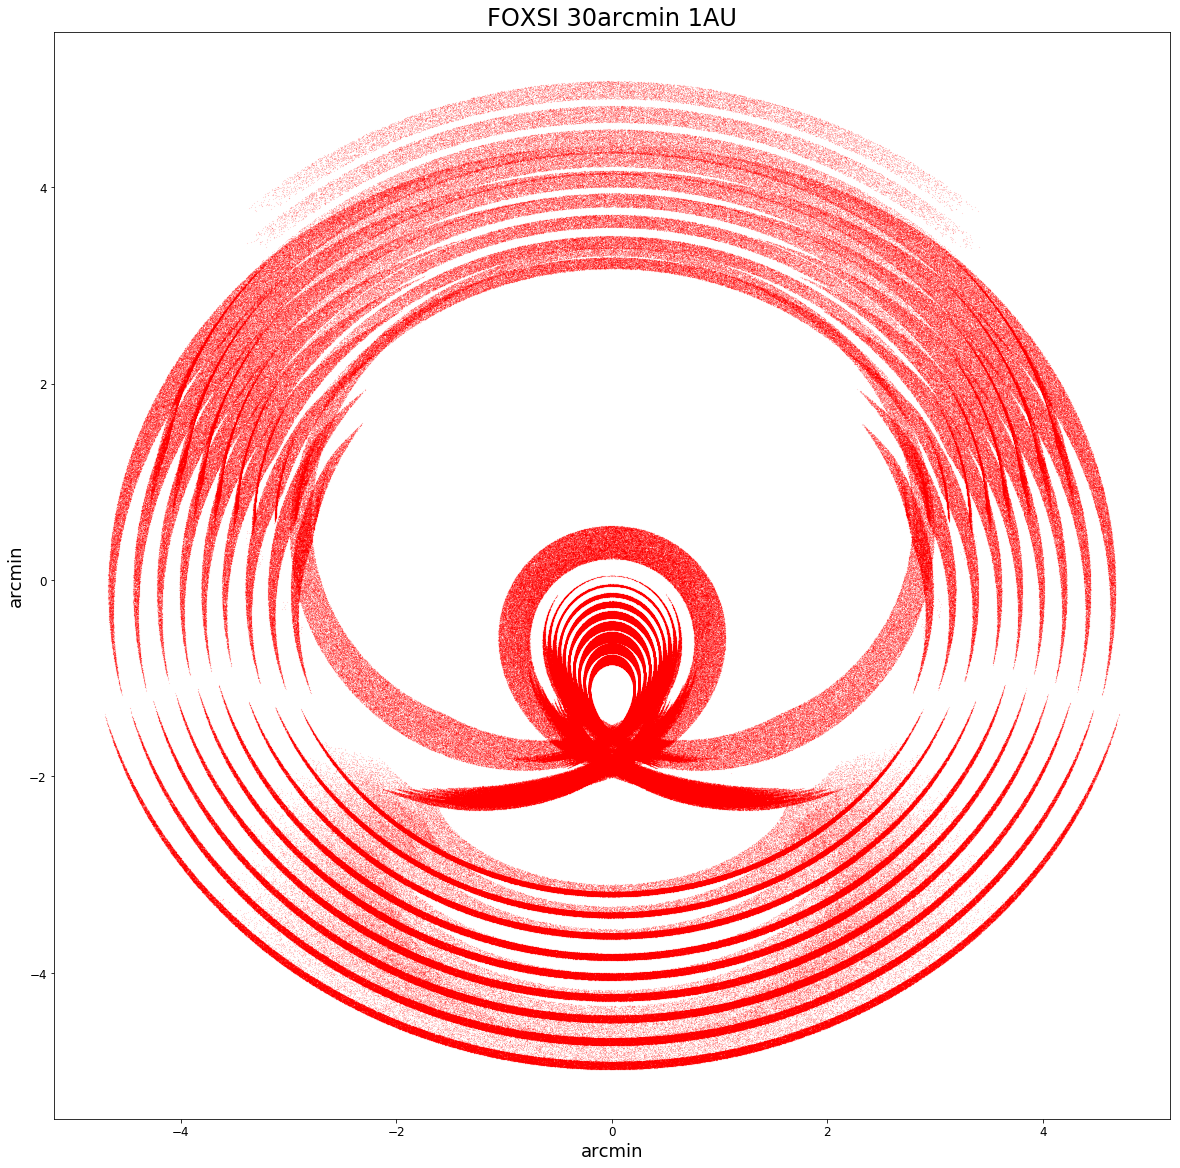

In [14]:
fig = plt.figure(figsize=(20,20))
plt.title('FOXSI 30arcmin 1AU',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(MHx,MHy,color='red',s=0.001,alpha=0.8)
plt.scatter(MPx,MPy,color='red',s=0.001,alpha=0.8)
plt.scatter(MDx,MDy,color='red',s=0.001,alpha=0.8)
#plt.ylim(-2.5,0.5)
#plt.xlim(-2.,2.)
plt.show()